In [66]:
# 載入套件
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [67]:
# 讀入IRIS資料集
iris_dataset = load_iris()
data = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
data['target'] = iris_dataset.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [68]:
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [69]:
# train_test_split
train, test = train_test_split(data, train_size=0.8, test_size = 0.2, shuffle=True, stratify=data['target'])
train.groupby('target').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,40,40,40,40
1,40,40,40,40
2,40,40,40,40


In [70]:
test.groupby('target').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,10,10,10,10
1,10,10,10,10
2,10,10,10,10


In [71]:
# 丟棄 petal length (cm) &	petal width (cm)
train = train.drop(['petal length (cm)', 'petal width (cm)'], axis=1)
train

,sepal length (cm),sepal width (cm),target
53,5.5,2.3,1
142,5.8,2.7,2
61,5.9,3.0,1
106,4.9,2.5,2
117,7.7,3.8,2
...,...,...,...
40,5.0,3.5,0
101,5.8,2.7,2
119,6.0,2.2,2
12,4.8,3.0,0


In [72]:
test = test.drop(['petal length (cm)', 'petal width (cm)'], axis=1)
test

,sepal length (cm),sepal width (cm),target
100,6.3,3.3,2
50,7.0,3.2,1
62,6.0,2.2,1
81,5.5,2.4,1
114,5.8,2.8,2
94,5.6,2.7,1
93,5.0,2.3,1
71,6.1,2.8,1
124,6.7,3.3,2
24,4.8,3.4,0


In [73]:
# 特徵選曲(Sepal Length & Sepal Width)
train_select_features = train.drop('target', axis=1)
train_select_features

,sepal length (cm),sepal width (cm)
53,5.5,2.3
142,5.8,2.7
61,5.9,3.0
106,4.9,2.5
117,7.7,3.8
...,...,...
40,5.0,3.5
101,5.8,2.7
119,6.0,2.2
12,4.8,3.0


In [74]:
test_select_features = test.drop('target', axis=1)
test_select_features

,sepal length (cm),sepal width (cm)
100,6.3,3.3
50,7.0,3.2
62,6.0,2.2
81,5.5,2.4
114,5.8,2.8
94,5.6,2.7
93,5.0,2.3
71,6.1,2.8
124,6.7,3.3
24,4.8,3.4


In [75]:
# clf = MLPClassifier(hidden_layer_sizes=(8,), activation='tanh', solver='adam', learning_rate='constant', learning_rate_init=0.2)
# clf = MLPClassifier(hidden_layer_sizes=(10), activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.001, batch_size='auto', power_t=0.5, max_iter=200,tol=1e-4)
# clf = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', solver='adam', learning_rate='constant', learning_rate_init=0.2)
# clf = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', solver='lbfgs')

In [76]:
# 多層感知器分類
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='lbfgs')
clf

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='lbfgs')

In [77]:
clf.fit(train_select_features, train['target'])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='lbfgs')

In [180]:
print(accuracy_score(test['target'], clf.predict(test_select_features)))

0.9


In [178]:
# 權重矩陣
print(clf.coefs_)

[array([[ -6.66447793,  -7.89053756,  -3.03358645,  -5.67667286,
         -0.28496035,  -0.75083049,  -8.09103514,  29.97918739,
          9.26146456, -13.55900951],
       [ -9.34948951,   6.14560948,   3.15052987, -27.23519029,
         -6.91145704,  -0.2460232 ,   1.69409606,  -9.83952719,
          0.08533446,   4.59662381]]), array([[  5.53932295,  -0.67651246,  -4.34075159],
       [ 30.19942483, -18.28080428, -12.2276623 ],
       [  5.00516798,   6.86665349, -12.49405298],
       [ 27.84791409, -10.12643097, -17.65377426],
       [ 20.18489394,  -5.78542961, -14.78003794],
       [ 10.83633048,   1.56289416, -12.11507808],
       [ 12.85108799,  -3.14999839,  -9.64593182],
       [-11.33041121,   5.41988428,   5.68886637],
       [-20.09001984,  -0.61923014,  20.63898908],
       [ 15.27125054, -14.51500743,  -0.55326716]])]


In [179]:
# 偏差向量 bias
print(clf.intercepts_)

[array([-2.6467559 , 22.37650723, 16.26179507, -4.48824462, -1.36457523,
        6.65600028,  1.41586206, -0.97651068, -6.13436216, 10.8194224 ]), array([ 1.11347036, -4.7450824 ,  3.49496114])]


In [81]:
W1 = clf.coefs_[0].tolist()
W1.insert(0,clf.intercepts_[0].tolist())
pd.DataFrame(W1, index=['W0','W1','W2'])

,0,1,2,3,4,5,6,7,8,9
W0,-2.646756,22.376507,16.261795,-4.488245,-1.364575,6.656000,1.415862,-0.976511,-6.134362,10.819422
W1,-6.664478,-7.890538,-3.033586,-5.676673,-0.284960,-0.750830,-8.091035,29.979187,9.261465,-13.559010
W2,-9.349490,6.145609,3.150530,-27.235190,-6.911457,-0.246023,1.694096,-9.839527,0.085334,4.596624


In [82]:
index = [f'W{i}' for i in range(0, 10)]
index.insert(0, 'bias')
W2 = clf.coefs_[1].tolist()
W2.insert(0,clf.intercepts_[1].tolist())
pd.DataFrame(W2, index=index)

,0,1,2
bias,1.113470,-4.745082,3.494961
W0,5.539323,-0.676512,-4.340752
W1,30.199425,-18.280804,-12.227662
W2,5.005168,6.866653,-12.494053
W3,27.847914,-10.126431,-17.653774
W4,20.184894,-5.785430,-14.780038
W5,10.836330,1.562894,-12.115078
W6,12.851088,-3.149998,-9.645932
W7,-11.330411,5.419884,5.688866
W8,-20.090020,-0.619230,20.638989


In [84]:
# 視覺化（丟入150筆資料繪圖）
AllData_select_features = data.drop(['petal length (cm)', 'petal width (cm)', 'target'], axis=1)
AllData_select_features

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [85]:
# 插入Bias
AllData_select_features.insert(0, 'Bias', list([1]*150))
AllData_select_features

,Bias,sepal length (cm),sepal width (cm)
0,1,5.1,3.5
1,1,4.9,3.0
2,1,4.7,3.2
3,1,4.6,3.1
4,1,5.0,3.6
...,...,...,...
145,1,6.7,3.0
146,1,6.3,2.5
147,1,6.5,3.0
148,1,6.2,3.4


In [86]:
# 轉成numpy array
AllData_select_features = np.array(AllData_select_features)
AllData_select_features

array([[1. , 5.1, 3.5],
       [1. , 4.9, 3. ],
       [1. , 4.7, 3.2],
       [1. , 4.6, 3.1],
       [1. , 5. , 3.6],
       [1. , 5.4, 3.9],
       [1. , 4.6, 3.4],
       [1. , 5. , 3.4],
       [1. , 4.4, 2.9],
       [1. , 4.9, 3.1],
       [1. , 5.4, 3.7],
       [1. , 4.8, 3.4],
       [1. , 4.8, 3. ],
       [1. , 4.3, 3. ],
       [1. , 5.8, 4. ],
       [1. , 5.7, 4.4],
       [1. , 5.4, 3.9],
       [1. , 5.1, 3.5],
       [1. , 5.7, 3.8],
       [1. , 5.1, 3.8],
       [1. , 5.4, 3.4],
       [1. , 5.1, 3.7],
       [1. , 4.6, 3.6],
       [1. , 5.1, 3.3],
       [1. , 4.8, 3.4],
       [1. , 5. , 3. ],
       [1. , 5. , 3.4],
       [1. , 5.2, 3.5],
       [1. , 5.2, 3.4],
       [1. , 4.7, 3.2],
       [1. , 4.8, 3.1],
       [1. , 5.4, 3.4],
       [1. , 5.2, 4.1],
       [1. , 5.5, 4.2],
       [1. , 4.9, 3.1],
       [1. , 5. , 3.2],
       [1. , 5.5, 3.5],
       [1. , 4.9, 3.6],
       [1. , 4.4, 3. ],
       [1. , 5.1, 3.4],
       [1. , 5. , 3.5],
       [1. , 4.5

In [87]:
def sigmoid(v):
    return 1 / (1 + np.exp(-v))

In [95]:
# 內積
HiddenLayer = list()
for _input in AllData_select_features: 
  HiddenLayer.append(sigmoid(np.matmul(_input, W1))) # W1為隱藏層權重
HiddenLayer

[array([7.54836710e-31, 9.74528630e-01, 9.99992625e-01, 1.20000170e-56,
        1.86460355e-12, 8.77146730e-01, 1.85836203e-15, 1.00000000e+00,
        1.00000000e+00, 4.50764122e-19]),
 array([3.06858432e-28, 8.95640891e-01, 9.99980573e-01, 3.06406400e-50,
        6.25376669e-11, 9.03685391e-01, 4.01828209e-15, 1.00000000e+00,
        1.00000000e+00, 6.81594010e-19]),
 array([1.79358069e-28, 9.93014655e-01, 9.99994360e-01, 4.10911977e-52,
        1.66177218e-11, 9.12121877e-01, 2.84423920e-14, 1.00000000e+00,
        1.00000000e+00, 2.57338070e-17]),
 array([8.89608019e-28, 9.94126559e-01, 9.99994294e-01, 1.10431470e-50,
        3.41277708e-11, 9.19790805e-01, 5.39239444e-14, 1.00000000e+00,
        1.00000000e+00, 6.30573193e-17]),
 array([5.77091187e-31, 9.93618902e-01, 9.99996026e-01, 1.38965613e-57,
        9.61172664e-13, 8.82483807e-01, 4.94416747e-15, 1.00000000e+00,
        1.00000000e+00, 2.76973666e-18]),
 array([2.42871489e-33, 9.76694428e-01, 9.99994803e-01, 4.05826507e-62

In [96]:
# 插入Bias
df_HiddenLayer = pd.DataFrame(HiddenLayer, columns=[f'H{i}' for i in range(0,10)])
df_HiddenLayer.insert(0, 'Bias', list([1]*150))
df_HiddenLayer

,Bias,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9
0,1,7.548367e-31,0.974529,0.999993,1.200002e-56,1.864604e-12,0.877147,1.858362e-15,1.0,1.0,4.507641e-19
1,1,3.068584e-28,0.895641,0.999981,3.064064e-50,6.253767e-11,0.903685,4.018282e-15,1.0,1.0,6.815940e-19
2,1,1.793581e-28,0.993015,0.999994,4.109120e-52,1.661772e-11,0.912122,2.844239e-14,1.0,1.0,2.573381e-17
3,1,8.896080e-28,0.994127,0.999994,1.104315e-50,3.412777e-11,0.919791,5.392394e-14,1.0,1.0,6.305732e-17
4,1,5.770912e-31,0.993619,0.999996,1.389656e-57,9.611727e-13,0.882484,4.944167e-15,1.0,1.0,2.769737e-18
...,...,...,...,...,...,...,...,...,...,...,...
145,1,1.892846e-33,0.000006,0.995451,1.118593e-54,3.744377e-11,0.708346,1.901231e-21,1.0,1.0,1.714117e-29
146,1,2.917894e-30,0.000006,0.993481,8.889094e-48,1.329493e-09,0.787632,2.073593e-20,1.0,1.0,3.902450e-28
147,1,7.177686e-33,0.000028,0.997515,3.481301e-54,3.963975e-11,0.738374,9.589884e-21,1.0,1.0,2.580839e-28
148,1,1.259261e-33,0.003506,0.999716,3.549022e-58,2.720288e-12,0.762126,2.139319e-19,1.0,1.0,9.481067e-26


In [97]:
# 轉成numpy array
HiddenLayer = np.array(df_HiddenLayer)
HiddenLayer

array([[1.00000000e+00, 7.54836710e-31, 9.74528630e-01, ...,
        1.00000000e+00, 1.00000000e+00, 4.50764122e-19],
       [1.00000000e+00, 3.06858432e-28, 8.95640891e-01, ...,
        1.00000000e+00, 1.00000000e+00, 6.81594010e-19],
       [1.00000000e+00, 1.79358069e-28, 9.93014655e-01, ...,
        1.00000000e+00, 1.00000000e+00, 2.57338070e-17],
       ...,
       [1.00000000e+00, 7.17768635e-33, 2.82282669e-05, ...,
        1.00000000e+00, 1.00000000e+00, 2.58083921e-28],
       [1.00000000e+00, 1.25926054e-33, 3.50604859e-03, ...,
        1.00000000e+00, 1.00000000e+00, 9.48106653e-26],
       [1.00000000e+00, 3.91374090e-31, 3.20179759e-03, ...,
        1.00000000e+00, 1.00000000e+00, 8.80892179e-25]])

In [157]:
# 內積
Output_Predict = list()
for _input in HiddenLayer:
  Output_Predict.append(np.matmul(_input, W2))
Output_Predict


[array([13.63342634, -9.52210507, -5.21405236]),
 array([11.53858335, -8.03857938, -4.57080709]),
 array([14.57070458, -9.8053701 , -5.86384154]),
 array([14.68738615, -9.81371133, -5.97034636]),
 array([14.26779291, -9.86272595, -5.51218335]),
 array([13.27258064, -9.62316129, -4.76399843]),
 array([14.77570841, -9.91276265, -5.96274191]),
 array([13.86604365, -9.57889303, -5.38817559]),
 array([14.88605352, -9.82406401, -6.15534857]),
 array([12.87635003, -8.86589263, -5.09580773]),
 array([11.77018099, -8.66033989, -4.20644539]),
 array([14.53184539, -9.86700408, -5.76709397]),
 array([13.2407505 , -9.01741611, -5.30905479]),
 array([15.01381822, -9.87641239, -6.23085969]),
 array([ 6.42051728, -5.87435596, -1.61001797]),
 array([13.05010768, -9.91917516, -4.26418397]),
 array([13.27258064, -9.62316129, -4.76399843]),
 array([13.63342634, -9.52210507, -5.21405236]),
 array([ 3.99663817, -4.24493033, -0.78286801]),
 array([14.18967339, -9.9251978 , -5.37613192]),
 array([ 3.87800175,

In [160]:
pd.DataFrame(Output_Predict, columns=[f'predict{i}' for i in range(0,3)])

,predict0,predict1,predict2
0,13.633426,-9.522105,-5.214052
1,11.538583,-8.038579,-4.570807
2,14.570705,-9.805370,-5.863842
3,14.687386,-9.813711,-5.970346
4,14.267793,-9.862726,-5.512183
...,...,...,...
145,-17.648508,7.997955,8.803852
146,-16.799189,8.108333,7.867910
147,-17.312117,8.058647,8.414010
148,-16.938682,8.047303,8.056225


In [101]:
# 內積
Output_Predict = list()
for _input in HiddenLayer:
  Output_Predict.append(sigmoid(np.matmul(_input, W2)))
Output_Predict


[array([9.99998800e-01, 7.32100183e-05, 5.41015678e-03]),
 array([9.99990253e-01, 3.22663009e-04, 1.02435862e-02]),
 array([9.99999530e-01, 5.51515753e-05, 2.83226700e-03]),
 array([9.99999582e-01, 5.46934816e-05, 2.54685385e-03]),
 array([9.99999364e-01, 5.20774761e-05, 4.02104882e-03]),
 array([9.99998279e-01, 6.61736992e-05, 8.45925921e-03]),
 array([9.99999617e-01, 4.95359353e-05, 2.56624521e-03]),
 array([9.99999049e-01, 6.91686936e-05, 4.54951120e-03]),
 array([9.99999657e-01, 5.41302088e-05, 2.11760737e-03]),
 array([9.99997442e-01, 1.41101123e-04, 6.08510423e-03]),
 array([9.99992268e-01, 1.73295349e-04, 1.46805070e-02]),
 array([9.99999511e-01, 5.18551692e-05, 3.11907772e-03]),
 array([9.99998223e-01, 1.21264386e-04, 4.92225168e-03]),
 array([9.99999698e-01, 5.13696122e-05, 1.96389503e-03]),
 array([0.99837483, 0.00280273, 0.16658612]),
 array([9.99997850e-01, 4.92193176e-05, 1.38683039e-02]),
 array([9.99998279e-01, 6.61736992e-05, 8.45925921e-03]),
 array([9.99998800e-01, 7.

In [117]:
df_OutputPredictLayer = pd.DataFrame(Output_Predict, columns=[f'predict{i}' for i in range(0,3)])
df_OutputPredictLayer

,predict0,predict1,predict2
0,9.999988e-01,0.000073,0.005410
1,9.999903e-01,0.000323,0.010244
2,9.999995e-01,0.000055,0.002832
3,9.999996e-01,0.000055,0.002547
4,9.999994e-01,0.000052,0.004021
...,...,...,...
145,2.164463e-08,0.999664,0.999850
146,5.060635e-08,0.999699,0.999617
147,3.030005e-08,0.999684,0.999778
148,4.401732e-08,0.999680,0.999683


In [161]:
df_OutputPredictLayer['target'] = data['target']
df_OutputPredictLayer

,predict0,predict1,predict2,target
0,13.633426,-9.522105,-5.214052,0
1,11.538583,-8.038579,-4.570807,0
2,14.570705,-9.805370,-5.863842,0
3,14.687386,-9.813711,-5.970346,0
4,14.267793,-9.862726,-5.512183,0
...,...,...,...,...
145,-17.648508,7.997955,8.803852,2
146,-16.799189,8.108333,7.867910,2
147,-17.312117,8.058647,8.414010,2
148,-16.938682,8.047303,8.056225,2


In [162]:
setosa_predict = df_OutputPredictLayer[df_OutputPredictLayer['target']==0]
setosa_predict = setosa_predict.drop('target',axis=1)
setosa_predict = setosa_predict.T
setosa_predict

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
predict0,13.633426,11.538583,14.570705,14.687386,14.267793,13.272581,14.775708,13.866044,14.886054,12.876350,...,14.133517,6.960353,14.940114,14.133517,14.189673,13.240751,14.189673,14.748698,13.072815,13.363228
predict1,-9.522105,-8.038579,-9.805370,-9.813711,-9.862726,-9.623161,-9.912763,-9.578893,-9.824064,-8.865893,...,-9.760929,-4.991281,-9.895276,-9.760929,-9.925198,-9.017416,-9.925198,-9.865706,-9.370767,-9.254784
predict2,-5.214052,-4.570807,-5.863842,-5.970346,-5.512183,-4.763998,-5.962742,-5.388176,-6.155349,-5.095808,...,-5.477331,-2.979570,-6.140626,-5.477331,-5.376132,-5.309055,-5.376132,-5.981016,-4.808187,-5.203361


In [163]:
setosa_predict_array = np.array(setosa_predict)
setosa_predict_array[2]

array([-5.21405236, -4.57080709, -5.86384154, -5.97034636, -5.51218335,
       -4.76399843, -5.96274191, -5.38817559, -6.15534857, -5.09580773,
       -4.20644539, -5.76709397, -5.30905479, -6.23085969, -1.61001797,
       -4.26418397, -4.76399843, -5.21405236, -0.78286801, -5.37613192,
       -1.08381548, -5.36732362, -5.92309769, -4.58562829, -5.76709397,
       -3.26908654, -5.38817559, -4.75939004, -4.28260276, -5.86384154,
       -5.55881477, -1.08381548, -5.19202159, -4.69061886, -5.09580773,
       -4.85566085, -0.43638181, -5.64631282, -6.15986808, -4.99364985,
       -5.47733112, -2.97957001, -6.14062582, -5.47733112, -5.37613192,
       -5.30905479, -5.37613192, -5.98101616, -4.80818696, -5.20336064])

In [164]:
versicolor_predict = df_OutputPredictLayer[df_OutputPredictLayer['target']==1]
versicolor_predict = versicolor_predict.drop('target',axis=1)
versicolor_predict = versicolor_predict.T
versicolor_predict

,50,51,52,53,54,55,56,57,58,59,...,90,91,92,93,94,95,96,97,98,99
predict0,-18.303318,-17.245179,-18.061249,-15.777338,-17.221798,-16.022383,-17.120174,-10.037105,-17.430294,-12.251148,...,-15.700085,-16.701615,-16.181470,-13.907753,-15.858963,-15.766898,-15.942016,-16.811266,-13.247603,-16.022383
predict1,7.894627,8.073389,7.929100,8.266134,8.058785,8.155423,8.079445,5.119206,8.029075,6.247364,...,8.159270,8.143065,8.217485,7.428868,8.159507,7.949129,8.081328,8.134674,6.944475,8.155423
predict2,9.545925,8.332748,9.275783,6.709843,8.327580,7.054798,8.203908,4.072732,8.560279,5.170955,...,6.735041,7.733085,7.152456,5.671820,6.890637,7.000278,7.046349,7.849279,5.485114,7.054798


In [165]:
versicolor_predictt_array = np.array(versicolor_predict)
versicolor_predictt_array[0]

array([-18.30331766, -17.24517903, -18.06124939, -15.77733784,
       -17.22179835, -16.02238287, -17.12017415, -10.03710533,
       -17.43029375, -12.25114787, -15.11154574, -16.36703027,
       -16.30448494, -16.66858462, -15.53801331, -17.69758465,
       -15.1209442 , -16.20061635, -16.56998008, -15.91145626,
       -16.21617957, -16.63247774, -16.7991888 , -16.63247774,
       -17.10843277, -17.47693684, -17.74163822, -17.64850821,
       -16.52515558, -16.05184677, -15.7788685 , -15.7788685 ,
       -16.20061635, -16.46384104, -11.62110283, -16.25434871,
       -17.69758465, -16.73969157, -15.1209442 , -15.75929321,
       -15.70008521, -16.70161497, -16.18147032, -13.9077527 ,
       -15.85896346, -15.76689777, -15.94201642, -16.81126587,
       -13.24760285, -16.02238287])

In [166]:
virginica_predict = df_OutputPredictLayer[df_OutputPredictLayer['target']==2]
virginica_predict = virginica_predict.drop('target',axis=1)
virginica_predict = virginica_predict.T
virginica_predict

,100,101,102,103,104,105,106,107,108,109,...,140,141,142,143,144,145,146,147,148,149
predict0,-17.120174,-16.200616,-18.413241,-16.957232,-17.312117,-19.640252,-6.812746,-18.841450,-17.465860,-18.922940,...,-17.697585,-18.061249,-16.200616,-17.927348,-17.801412,-17.648508,-16.799189,-17.312117,-16.938682,-16.367030
predict1,8.079445,8.204857,7.822683,8.112651,8.058647,7.336354,3.152159,7.625312,7.919630,7.822862,...,7.998293,7.929100,8.204857,7.965431,7.992259,7.997955,8.108333,8.058647,8.047303,8.135906
predict2,8.203908,7.182950,9.731794,8.013904,8.414010,11.450894,2.781647,10.362775,8.717175,10.218896,...,8.850375,9.275783,7.182950,9.106949,8.956317,8.803852,7.867910,8.414010,8.056225,7.411384


In [167]:
virginica_predictt_array = np.array(virginica_predict)
virginica_predictt_array[0]

array([-17.12017415, -16.20061635, -18.4132411 , -16.95723201,
       -17.31211657, -19.64025163,  -6.81274637, -18.84144985,
       -17.46586031, -18.92293997, -17.40845246, -17.02335234,
       -17.82730119, -16.03806245, -16.20764462, -17.24517903,
       -17.31211657, -20.08479787, -20.50515481, -16.30448494,
       -18.11210721, -15.75458023, -20.13902195, -16.87397591,
       -17.8014123 , -18.70679953, -16.77118567, -16.70161497,
       -17.06483513, -18.62833475, -19.12065956, -20.52077385,
       -17.06483513, -16.91489288, -16.5586884 , -19.94819918,
       -17.1472672 , -17.19937667, -16.54561798, -18.06124939,
       -17.69758465, -18.06124939, -16.20061635, -17.92734804,
       -17.8014123 , -17.64850821, -16.7991888 , -17.31211657,
       -16.93868249, -16.36703027])

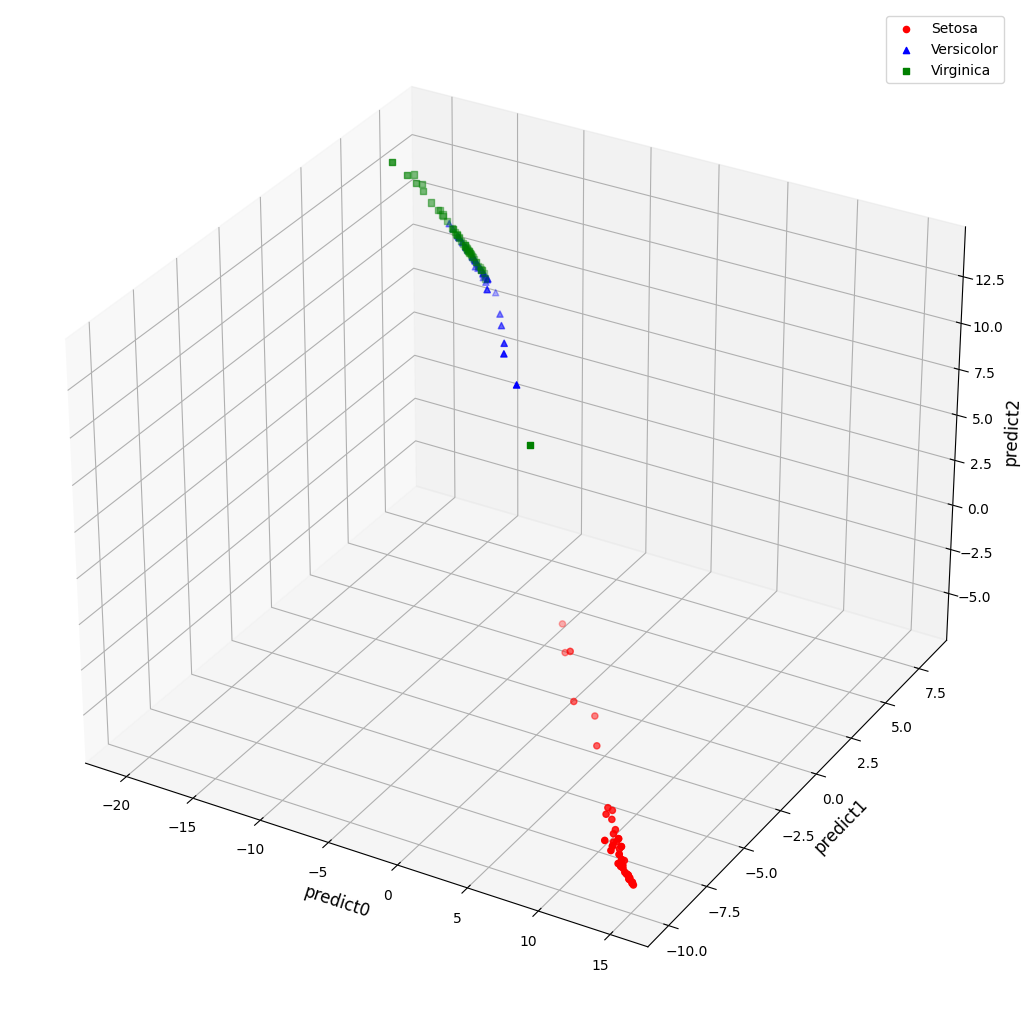

In [174]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(setosa_predict_array[0], setosa_predict_array[1], setosa_predict_array[2], c='r', marker='o', label='Setosa')
ax.scatter(versicolor_predictt_array[0], versicolor_predictt_array[1], versicolor_predictt_array[2], c='b', marker='^', label='Versicolor')
ax.scatter(virginica_predictt_array[0], virginica_predictt_array[1], virginica_predictt_array[2], c='g', marker='s', label='Virginica')
ax.set_xlabel('predict0', fontsize=12)
ax.set_ylabel('predict1', fontsize=12)
ax.set_zlabel('predict2', fontsize=12)
# 設定圖例
ax.legend()
plt.show()

In [ ]:
print(len(clf.predict(test_select_features)), len(test_select_features))
clf.predict(test_select_features)


30 30


array([0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 0,
       2, 2, 0, 0, 2, 1, 2, 0])

In [171]:
df_predict = pd.DataFrame({
       'sepal length (cm)':test['sepal length (cm)'],
       'sepal width (cm)':test['sepal width (cm)'],
       '預測值':clf.predict(test_select_features),
       '實際值':test['target']})
df_predict_wrong = df_predict[df_predict['實際值']!=df_predict['預測值']]
df_predict_wrong.reset_index(drop=True)

,sepal length (cm),sepal width (cm),預測值,實際值
0,7.0,3.2,2,1
1,5.8,2.8,1,2
2,6.5,2.8,2,1


In [172]:
# confusion matrix
mat = pd.DataFrame(confusion_matrix(test['target'], clf.predict(test_select_features)), index=['0 setosa', '1 versicolor', '2 virginica'], columns=['0 setosa', '1 versicolor', '2 virginica'])
mat

,0 setosa,1 versicolor,2 virginica
0 setosa,10,0,0
1 versicolor,0,8,2
2 virginica,0,1,9


In [199]:
precision = 34/46
recall = 34/50
F1 = 2 * (precision * recall) / (precision + recall)
round(F1,3)

0.708

In [ ]:
print(clf.classes_)

[0 1 2]


In [ ]:
print(clf.n_layers_)

3


In [ ]:
clf.loss_

0.3616869938115217

In [194]:
AllData_select_features = data.drop(['petal length (cm)', 'petal width (cm)', 'target'], axis=1)
clf.predict(AllData_select_features)

df_predict = pd.DataFrame({
       'sepal length (cm)':AllData_select_features['sepal length (cm)'],
       'sepal width (cm)':AllData_select_features['sepal width (cm)'],
       '預測值':clf.predict(AllData_select_features),
       '實際值':data['target']})

df_predict_wrong = df_predict[df_predict['實際值']!=df_predict['預測值']]
df_predict_wrong = df_predict_wrong.reset_index(drop=True)

print(accuracy_score(data['target'], clf.predict(AllData_select_features)))
# confusion matrix
mat = pd.DataFrame(confusion_matrix(data['target'], clf.predict(AllData_select_features)), index=['0 setosa', '1 versicolor', '2 virginica'], columns=['0 setosa', '1 versicolor', '2 virginica'])
mat

0.8133333333333334


,0 setosa,1 versicolor,2 virginica
0 setosa,50,0,0
1 versicolor,0,38,12
2 virginica,0,16,34


In [195]:
df_predict_wrong

,sepal length (cm),sepal width (cm),預測值,實際值
0,7.0,3.2,2,1
1,6.4,3.2,2,1
2,6.9,3.1,2,1
3,6.5,2.8,2,1
4,6.3,3.3,2,1
5,6.6,2.9,2,1
6,6.7,3.1,2,1
7,6.4,2.9,2,1
8,6.6,3.0,2,1
9,6.8,2.8,2,1


In [ ]:
'''
# 只適用solver=adam或sgd
pd.DataFrame(clf.loss_curve_)
'''

AttributeError: ignored

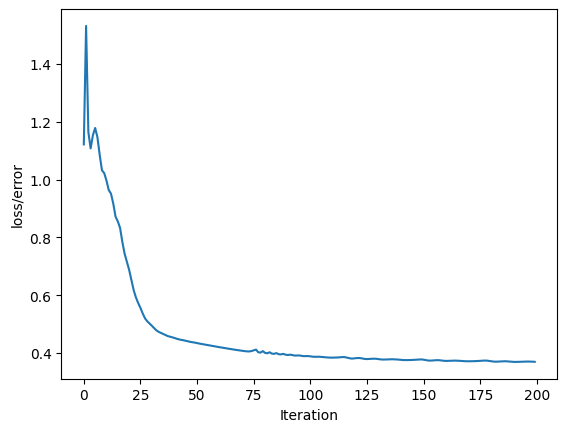

In [ ]:
'''
# 只適用solver=adam或sgd
import matplotlib.pyplot as plt
plt.plot(clf.loss_curve_,)
plt.xlabel('Iteration')
plt.ylabel('loss/error')
plt.show()
'''

In [ ]:
#coding:utf-8
from sklearn import neural_network
from sklearn.datasets import load_iris
import numpy as np
import sys

iris = load_iris()
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(10), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001, power_t=0.5, max_iter=200 ,tol=1e-4)
mlp.fit(iris.data,iris.target)
print('预测结果', mlp.predict([[1,2,3,4]]))#预测结果
print(mlp.n_outputs_)#输出类别数
print(mlp.classes_)#所有类别
print('损失函数的损失值', mlp.loss_)#损失函数的损失值
print(mlp.intercepts_)#偏移量
print(mlp.coefs_)#权重
print(mlp.n_iter_)#迭代轮数
print(mlp.n_layers_)#网络层数，只有一层隐藏层时 =3
print(mlp.out_activation_)#输出层激活函数的名称
print('層數', mlp.n_layers_)


预测结果 [1]
3
[0 1 2]
损失函数的损失值 0.7718828408416423
[array([-0.39148634,  0.15279542, -0.50167309, -0.40399511,  0.00628404,
       -0.20556272,  0.19291743, -0.12306288,  0.59959562,  0.01667808]), array([ 8.41185250e-02, -2.17356855e-01,  6.86581910e-05])]
[array([[ 1.61892879e-05, -3.97008522e-01,  1.35567585e-01,
         3.34030811e-01,  4.38611604e-01,  2.64178079e-01,
        -2.89444457e-01, -1.35016931e-01, -3.25617894e-01,
         2.93337685e-02],
       [-1.76065928e-01, -2.32533028e-01, -5.69923172e-01,
         2.18298063e-01, -2.20605165e-01, -2.96266242e-01,
        -2.35766160e-01, -1.39776998e-01,  2.49765028e-05,
         4.96515074e-01],
       [ 1.29050844e-01, -3.83905496e-01,  1.20950887e-03,
         2.90831284e-01,  2.38407693e-01, -1.45663087e-02,
         6.83975379e-02, -4.50960882e-01, -4.60737811e-02,
        -1.79075285e-01],
       [-2.77419953e-01,  4.50197933e-01,  4.54492835e-01,
        -1.71180329e-01,  5.02671998e-01, -4.31625744e-01,
         3.4228081

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
iris_dataset = load_iris()
data = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
data['target'] = iris_dataset.target
data




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 特徵選曲(Sepal Length & Sepal Width)
features = data.drop('target', axis=1)
select_features = features.drop(['petal length (cm)', 'petal width (cm)'], axis=1)
select_features

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(select_features, data['target'], test_size=0.25)
x_train, x_test, y_train, y_test = train_test_split(features, data['target'], test_size=0.25)

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(8,), activation='tanh', solver='adam', learning_rate='constant', learning_rate_init=0.2)
clf.fit(x_train, y_train)


MLPClassifier(activation='tanh', hidden_layer_sizes=(8,),
              learning_rate_init=0.2)

In [ ]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,4.9,3.0,1.4,0.2
132,6.4,2.8,5.6,2.2
114,5.8,2.8,5.1,2.4
50,7.0,3.2,4.7,1.4
66,5.6,3.0,4.5,1.5
98,5.1,2.5,3.0,1.1
111,6.4,2.7,5.3,1.9
7,5.0,3.4,1.5,0.2
5,5.4,3.9,1.7,0.4
137,6.4,3.1,5.5,1.8


In [ ]:
print(accuracy_score(y_test, clf.predict(x_test)))
print(y_train[1:6])
print(clf.coefs_)
print(clf.intercepts_)

0.6842105263157895
100    2
62     1
88     1
23     0
119    2
Name: target, dtype: int64
[array([[ 1.36195541,  0.78822418,  1.71749247, -0.64794185, -1.32540577,
         0.45458369,  1.86771899, -0.43508636],
       [ 1.46862292,  0.21429982,  0.6453908 , -0.3538847 , -1.47428496,
         1.27554221, -0.86661759, -0.85814846],
       [ 1.03341543,  0.89820744,  1.6599467 , -0.16787947, -1.54327178,
        -1.74654539,  0.87620822,  1.43429848],
       [ 0.05760844,  0.73263971,  1.8257716 , -0.21078618, -1.20338233,
        -2.36757534,  1.25785446,  2.09403759]]), array([[ 0.35350359, -0.1840704 , -0.63868376],
       [ 0.31416312,  0.78794783, -0.03345983],
       [ 0.59765551, -0.099202  , -0.74886845],
       [-0.54633609,  0.46446367,  0.80718558],
       [-0.65634119, -0.0643431 , -0.03008573],
       [ 4.04604417, -3.30838358, -2.32064913],
       [-0.51778644,  0.69662274,  0.18391714],
       [-1.38932796, -3.0267862 ,  3.58064005]])]
[array([ 1.16778438,  0.62071331,  1

#Draft

In [ ]:
'''
score_list = list()
for i in range(5,20):
  for j in range(5,20):
    clf = MLPClassifier(hidden_layer_sizes=(i,j), activation='logistic', solver='adam', learning_rate='constant', learning_rate_init=0.2)
    clf.fit(train_select_features, train['target'])
    # print(i, j)
    # print(accuracy_score(test['target'], clf.predict(test_select_features)))
    score = accuracy_score(test['target'], clf.predict(test_select_features))
    score_list.append(score)
    if score > 0.83: print(i,j, score)
max(score_list)
'''

"\nscore_list = list()\nfor i in range(5,20):\n  for j in range(5,20):\n    clf = MLPClassifier(hidden_layer_sizes=(i,j), activation='logistic', solver='adam', learning_rate='constant', learning_rate_init=0.2)\n    clf.fit(train_select_features, train['target'])\n    # print(i, j)\n    # print(accuracy_score(test['target'], clf.predict(test_select_features)))\n    score = accuracy_score(test['target'], clf.predict(test_select_features))\n    score_list.append(score)\n    if score > 0.83: print(i,j, score)\nmax(score_list)\n"

In [ ]:
'''
# GridSearchCV貪婪演算法，找出最佳參數。
# 幫你把每組參數都做一次上面那格(cv)
from sklearn.model_selection import GridSearchCV
params = {'hidden_layer_sizes':range(5,20)}
search = GridSearchCV(clf, params, n_jobs=-1)
search.fit(train_select_features, train['target'])
print('最佳分數', search.best_score_)
print('最佳參數', search.best_params_)
'''

"\n# GridSearchCV貪婪演算法，找出最佳參數。\n# 幫你把每組參數都做一次上面那格(cv)\nfrom sklearn.model_selection import GridSearchCV\nparams = {'hidden_layer_sizes':range(5,20)}\nsearch = GridSearchCV(clf, params, n_jobs=-1)\nsearch.fit(train_select_features, train['target'])\nprint('最佳分數', search.best_score_)\nprint('最佳參數', search.best_params_)\n"